# Dynamic Programming: Value Iteration

In [1]:
import numpy as np
import pprint
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv

In [2]:
pp = pprint.PrettyPrinter(indent=2)
env = GridworldEnv()

In [13]:
def value_iteration(env, theta=0.0001, discount_factor=1.0):
    """
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.        
    """
    

    V = np.zeros(env.nS)
    policy = np.zeros([env.nS, env.nA]) # We do not use the policy during the main loop, we extract the optimal policy by making it greedy
    
    # Implement!
    while True:
        delta = 0
        for s in range(env.nS):
            v = V[s] # storing the old value for s
            action_values = np.zeros(env.nA) 
            # we are in some state
            for a in range(env.nA):
                # we are now looking at all the possible actions in that state
                for prob, next_state, reward, done in env.P[s][a]:
                    # sum over all possible next states
                    action_values[a] += prob * (reward + discount_factor * V[next_state])
            best_action_value = np.max(action_values) # highest expected value amongst all actions
            V[s] = best_action_value # updating the value function for state s
            delta = max(delta, abs(v - V[s])) 
            # policy[s, best_action] = 1 # extracting best policy for that state - updating the policy here results in insufficient policy
        if delta < theta:
            break

        # extracting the policy
        for s in range(env.nS):
            action_values = np.zeros(env.nA)
            for a in range(env.nA):
                for prob, next_state, reward, done in env.P[s][a]:
                    action_values[a] += prob * (reward + discount_factor * V[next_state])
            best_action = np.argmax(action_values)
            policy[s] = np.eye(env.nA)[best_action]

    return policy, V

In [14]:
policy, v = value_iteration(env)

print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

Policy Probability Distribution:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]

Value Function:
[ 0. -1. -2. -3. -1. -2. -3. -2. -2. -3. -2. -1. -3. -2. -1.  0.]

Reshaped Grid Value Function:
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]



In [15]:
# Test the value function
expected_v = np.array([ 0, -1, -2, -3, -1, -2, -3, -2, -2, -3, -2, -1, -3, -2, -1,  0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

In [16]:
import matplotlib.pyplot as plt

def plot_value_function(V, shape, title="Value Function"):
    plt.figure(figsize=(6,6))
    plt.imshow(V.reshape(shape), cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title(title)
    plt.show()

def plot_policy(policy, shape, title="Policy"):
    # 0=up, 1=right, 2=down, 3=left
    action_arrows = {0: '↑', 1: '→', 2: '↓', 3: '←'}
    policy_grid = np.argmax(policy, axis=1).reshape(shape)
    plt.figure(figsize=(6,6))
    for i in range(shape[0]):
        for j in range(shape[1]):
            action = policy_grid[i, j]
            plt.text(j, i, action_arrows[action], ha='center', va='center', fontsize=24)
    plt.xlim(-0.5, shape[1]-0.5)
    plt.ylim(shape[0]-0.5, -0.5)
    plt.title(title)
    plt.grid(True)
    plt.show()

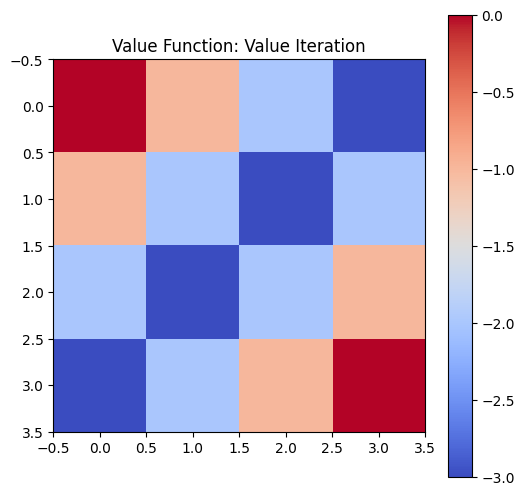

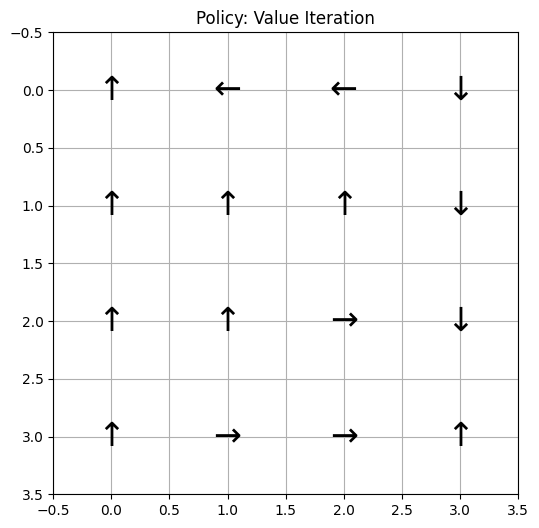

In [17]:
policy, V = value_iteration(env)
plot_value_function(V, env.shape, title="Value Function: Value Iteration")
plot_policy(policy, env.shape, title="Policy: Value Iteration")